In [ ]:
#PUNITH 210962012 ROLLNO:4

In [98]:
#Q1)Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
#salary and experience with exerience in x-axis and salary in y axis.

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('salary.csv')

In [62]:
x = np.array(df['salary'].values).reshape(-1,1)
y = np.array(df['experience'].values)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                    test_size=0.2,random_state=0)

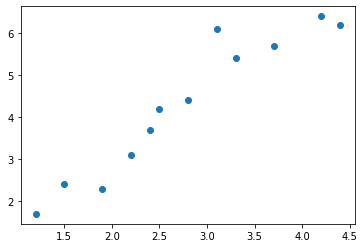

In [63]:
plt.scatter(y,x)

In [64]:
X = x_train
Y = y_train
mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)
numer = 0
denom = 0
for i in range(n):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print (f'B0 = {b0} \nB1 = {b1}')

B0 = [0.39157696] 
B1 = [0.5382254]


In [65]:
y_pred = b0 + b1*x_test
print('MSE : ',mean_squared_error(y_test, y_pred))

MSE :  0.15090649259413064


In [99]:
#Q1 A Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
#between beta and mean squared error(MSE) for each case.

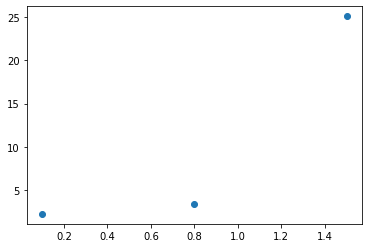

In [66]:
mses=[]
betas=[0.1,1.5,0.8]
for beta in betas:
    y_new = 1.1 + x*beta
    mse = mean_squared_error(y, y_new)
    mses.append(mse)
plt.scatter(betas,mses)

In [100]:
#Q1 B Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
#beta and mean squared error(MSE).

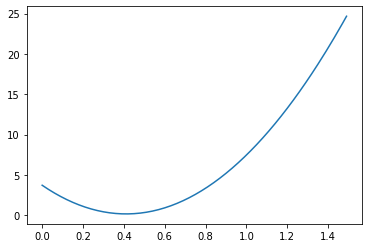

In [67]:
mses=[]
betas=[]
beta=0
while beta<=1.5:
    y_new = 1.1 + x*beta
    mse = mean_squared_error(y, y_new)
    betas.append(beta)
    mses.append(mse)
    beta=beta+0.01
plt.plot(betas,mses)

In [101]:
#Q1 C Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
#beta and mean squared error(MSE)

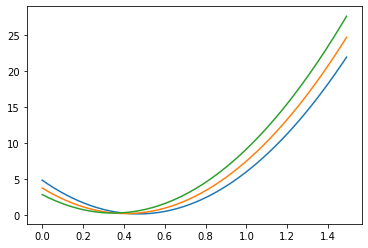

In [68]:
slope=[0.8,1.1,1.4]
for b in slope: 
    mses=[]
    betas=[]
    beta=0
    while beta<=1.5:
        y_new = b + x*beta
        mse = mean_squared_error(y, y_new)
        betas.append(beta)
        mses.append(mse)
        beta=beta+0.01
    plt.plot(betas,mses)

In [85]:
#Q1 D Use the scikit learn and compare the results of MSE

In [86]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print(f"intercept (B0): ",model.intercept_)
print(f"slope (B1): ",model.coef_)
print('MSE : ',mean_squared_error(y_test, y_pred))

intercept (B0):  0.39157695542472615
slope (B1):  [0.5382254]
MSE :  0.15090649259413064


In [105]:
#Q2) Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error
#for 60 iterations of 5 epochs.
#a. Plot the graph of error versus iteration.
#b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.
#c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('salary.csv')

In [90]:
x = np.array(df['salary'].values).reshape(-1,1)
y = np.array(df['experience'].values)

In [91]:
alpha=0.01
b0=0
b1=0
beta=[]
ite=np.arange(60)
error=[]
for j in range(0,5):
    for i in range(0,12):
        p=b0+b1*x[i]
        e=p-y[i]
        error.append(e)
        b0=b0-(alpha*e)
        b1=b1-(alpha*e*x[i])
        beta.append(b1)

In [92]:
print('B0 : ',b0)
print('B1 : ',b1)

B0 :  [0.15726001]
B1 :  [0.63699623]


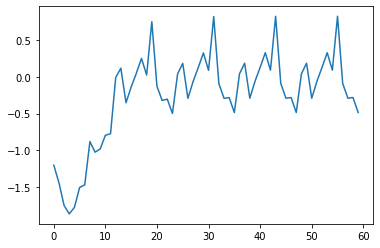

In [93]:
plt.plot(ite,error)

In [94]:
model = SGDRegressor(max_iter=60)
model.fit(x, y)

SGDRegressor(max_iter=60)

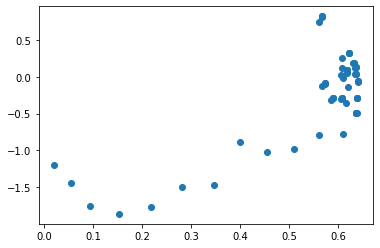

In [95]:
plt.scatter(beta,error)

In [104]:
#Additional
#Apply scikit learn model for Simple Linear regression using SGD of the given Salary_Data.csv dataset, and arrive at
#different values of B0, B1 and error for varying iterations. Plot the graph of epoch(X-axis) versus error(Y-axis).

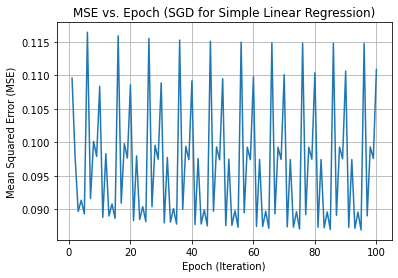

Final B0: 0.24864733601114644
Final B1: 0.6189115227595011
Final Error (MSE): 0.11089692826100338


In [96]:
max_iterations = 100  
learning_rate = 0.01

B0_values = []
B1_values = []
error_values = []

sgd_regressor = SGDRegressor(max_iter=1, tol=None, random_state=0, learning_rate='constant', eta0=learning_rate)

for iteration in range(1, max_iterations + 1):
    sgd_regressor.max_iter = iteration
    sgd_regressor.fit(x, y)
    B0 = sgd_regressor.intercept_[0]
    B1 = sgd_regressor.coef_[0]
    y_pred = sgd_regressor.predict(x)
    error = mean_squared_error(y, y_pred)
   
    B0_values.append(B0)
    B1_values.append(B1)
    error_values.append(error)

plt.plot(range(1, max_iterations + 1), error_values)
plt.xlabel('Epoch (Iteration)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Epoch (SGD for Simple Linear Regression)')
plt.grid(True)
plt.show()

final_error = error_values[-1]
final_B0 = B0_values[-1]
final_B1 = B1_values[-1]
print(f'Final B0: {final_B0}')
print(f'Final B1: {final_B1}')
print(f'Final Error (MSE): {final_error}')

